## Randomly Generated Points

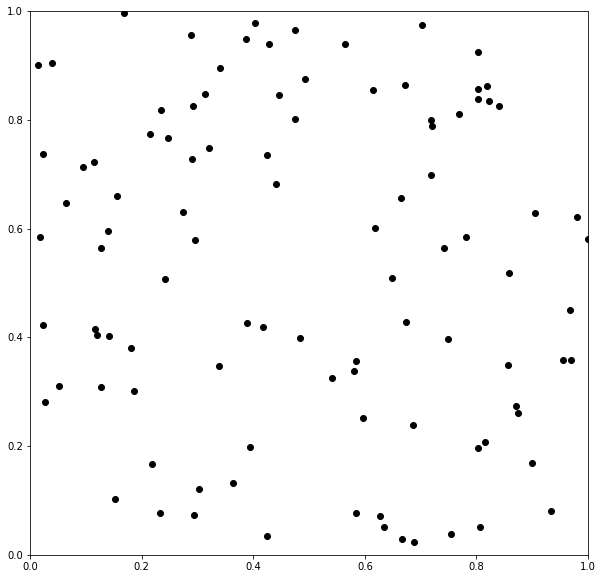

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from matplotlib.text import OffsetFrom
import Library as lib
import random as rd

fig, ax = plt.subplots(figsize=(10, 10))

samples = []

for i in range(100):
    ax.scatter(rd.random(), rd.random(), color = [0.0, 0.0, 0.0])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()

## Dart Throwing Points

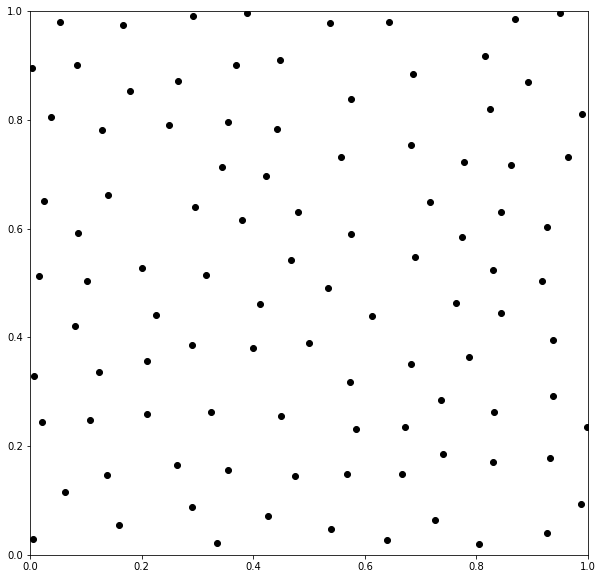

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from matplotlib.text import OffsetFrom
import Library as lib
import random as rd

sampleList = []
radius = 0.08
acceptNum = 0
goalNum = 100
while acceptNum < goalNum:
    randomPoint = [rd.random(), rd.random()]
    reject = False
    for sampledPoint in sampleList:
        if ((sampledPoint[0] - randomPoint[0]) * (sampledPoint[0] - randomPoint[0]) + (sampledPoint[1] - randomPoint[1])*(sampledPoint[1] - randomPoint[1])) < (radius * radius):
            reject = True
            break
    if not reject:
        sampleList.append(randomPoint)
        acceptNum = acceptNum + 1

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(100):
    ax.scatter(sampleList[i][0], sampleList[i][1], color = [0.0, 0.0, 0.0])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()


## Weighted Sample Elimination

Source Samples(500 Randomly Generated Points)

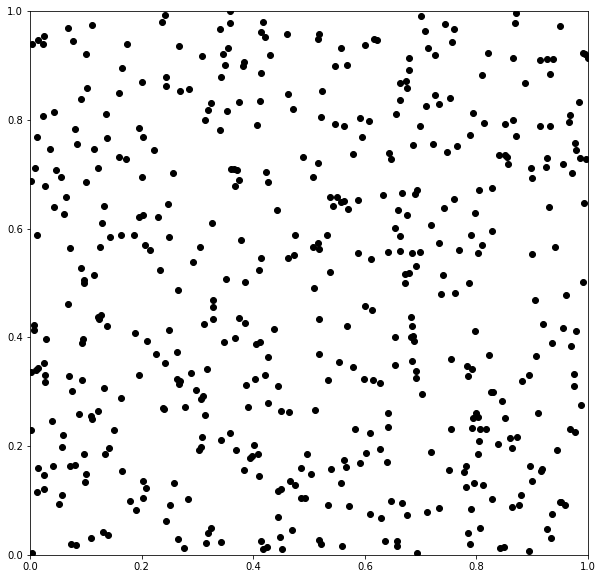

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from matplotlib.text import OffsetFrom
import Library as lib
import random as rd

fig, ax = plt.subplots(figsize=(10, 10))

samples = []

# Consistent Seed
rd.seed(12345)

for i in range(500):
    ax.scatter(rd.random(), rd.random(), color = [0.0, 0.0, 0.0])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()

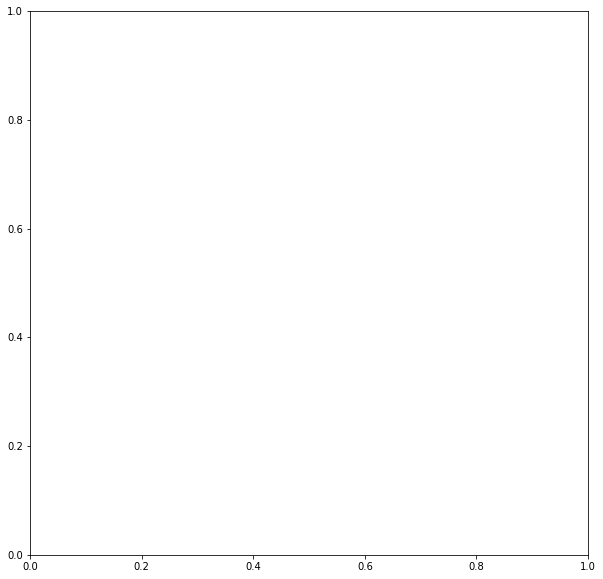

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from matplotlib.text import OffsetFrom
import Library as lib
import random as rd

def rmax2d(A, N):
    return math.sqrt(A / (2 * math.sqrt(3) * N))

def rmin2d(rmax, N, M, gamma = 1.5, beta = 0.65):
    return rmax * (1.0 - ((N / M)**gamma))*beta

def dijHat(dij, rmin, rmax):
    if dij > (2.0 * rmin):
        return min(dij, 2.0 * rmax)
    else:
        return 2.0 * rmin

def weight(dij, rmin, rmax, alpha = 8.0):
    return (1.0 - (dijHat(dij, rmin, rmax) / (2.0 * rmax))) ** alpha


def get_all_samples_with_in_2rmax(sampleList, i):
    result = []
    for j in range(len(sampleList)):
        if i == j:
            continue
        
        
    return result

samples = []

# Consistent Seed
rd.seed(12345)

for i in range(500):
    samples.append([rd.random(), rd.random()])

eliminatedSamples = []

# Assign Weights


# Build Heap


# Generate Samples


fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()